**MAB FUNCTION**

In [19]:
import numpy as np

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list

def unflatten(flat_list, structure):
    flat_iter = iter(flat_list)
    def helper(struct):
        result = []
        for elem in struct:
            if isinstance(elem, list):
                result.append(helper(elem))
            else:
                result.append(next(flat_iter))
        return result
    return helper(structure)

# Multi-Armed Bandit (UCB) Agent
def mab_function(parameter_values, bounds, m_iterations, e_factor):

    print("MAB Algorithm Started")

    para = flatten(parameter_values)
    len_para = len(para)

    max_iterations = m_iterations
    k = len_para
    exploration_factor = e_factor
    initial_values = [bounds[i][0] for i in range(len_para)]
    values = initial_values
    counts = np.zeros(k)
    reward_array = []

    def select_arm():
        total_counts = np.sum(counts)
        ucb_values = values + exploration_factor * np.sqrt(np.log(total_counts + 1) / (counts + 1e-6))
        return np.argmax(ucb_values)

    def update(arm, reward):
        counts[arm] += 1
        values[arm] += (reward - values[arm]) / counts[arm]

    for iter in range(max_iterations):

        # Select arm (parameter) to adjust using UCB
        arm = select_arm()
        para[arm] = max(bounds[arm][0], min(bounds[arm][1], para[arm] + np.random.uniform(-0.1, 0.1)))

        temp = unflatten(para, parameter_values)
        reward = objective_function(temp)

        update(arm, reward)

        reward_array.append(reward)

        if iter % 100 == 0 or iter == (max_iterations-1):
            print(f"Iteration {iter}: Best value = {max(reward_array)}")
    return reward_array

**MAIN PROGRAM EXAMPLE**

In [20]:
import matplotlib.pyplot as plt

**RATE CALCULATION METHOD**

In [21]:
def objective_function(para):
    a, b, c = para
    return a*b-c

**INITIAL VALUES OF PARAMETERS TO BE OPTIMIZED LIST**

In [22]:
# Initial Values of Parameters
p_values = [1,2,1]

**BOUNDS**

For bounds, you have to create a list for the range of all variables of each optimizable parameter lists.

Suppose you have a 2D optimizable parameter list say **X = 3x2** size.

Then you have to mention **[lower limit, upper limit]*6**, (6 = the list length)

**3 More Cases:**

* In case there are no lower or upper range, you must use **[ -(float('inf')) , (float('inf')) ]**

* In case there is only no lower limit, you must use **-(float('inf'))** as lower limit

* In case there is only no upper limit, you must use **(float('inf'))** as upper limit

In [23]:
bounds = [(1,10),(2,50),(1,200)]

**MAB FUNCTION PARAMETERS (YOU CAN CHANGE)**

In [24]:
m_iterations = 200
exploration_factor = 0.2
number_of_simulations = 100 # Average of result of number of simulations (Any Integer Number)

**RESULT**

In [25]:
average = []
for i in range(number_of_simulations):
    result = mab_function(p_values, bounds, m_iterations, exploration_factor)
    average.append(result)

MAB Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.6467230460221993
Iteration 199: Best value = 2.6720354233779684
MAB Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 3.136259616557206
Iteration 199: Best value = 4.050739018350058
MAB Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.6132037350612762
Iteration 199: Best value = 1.7559803176273694
MAB Algorithm Started
Iteration 0: Best value = 1.0495870835129275
Iteration 100: Best value = 1.4015657182211934
Iteration 199: Best value = 1.4497808062599595
MAB Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 2.051749525609995
Iteration 199: Best value = 2.988544048374537
MAB Algorithm Started
Iteration 0: Best value = 1.0600754818502076
Iteration 100: Best value = 1.3881458022758941
Iteration 199: Best value = 2.4633712824549834
MAB Algorithm Started
Iteration 0: Best value = 1
Iteration 100: Best value = 1.6848019563122174
Iteration

**AVERAGE OF SIMULATIONS RESULT**

In [26]:
column_sums = [0] * len(average[0])

for row in average:
    for i in range(len(row)):
        column_sums[i] += row[i]

num_rows = len(average)
column_averages = [sum_value / num_rows for sum_value in column_sums]

**RESULT PLOTTING**

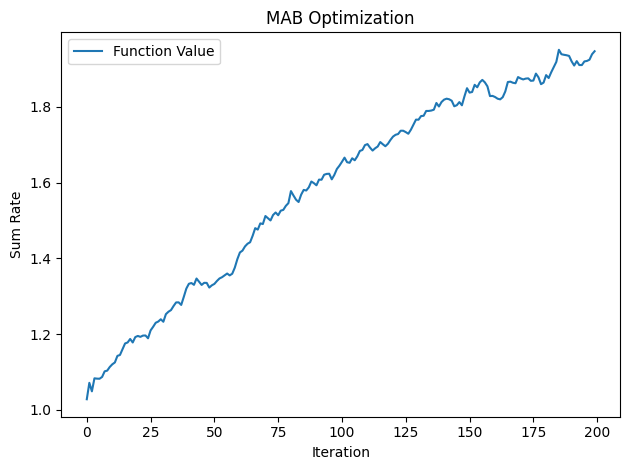

In [27]:
plt.plot(np.arange(len(column_averages)), column_averages, label='Function Value')
plt.title('MAB Optimization')
plt.xlabel('Iteration')
plt.ylabel('Sum Rate')
plt.legend()
plt.tight_layout()
plt.show()